# Libraries

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import shap
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None)

# Data

## Intake data

### Data url

In [6]:
intake_url = "https://data.austintexas.gov/resource/wter-evkm.csv?$limit=500000"

### Data pull

In [7]:
df_intakes = pd.read_csv(intake_url)

### Data preview

In [8]:
df_intakes.head()

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A521520,Nina,2013-10-01T07:51:00.000,2013-10-01T07:51:00.000,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan
1,A664235,NaN,2013-10-01T08:33:00.000,2013-10-01T08:33:00.000,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
2,A664236,NaN,2013-10-01T08:33:00.000,2013-10-01T08:33:00.000,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
3,A664237,NaN,2013-10-01T08:33:00.000,2013-10-01T08:33:00.000,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White
4,A664233,Stevie,2013-10-01T08:53:00.000,2013-10-01T08:53:00.000,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White


## Outcome data

### Data url

In [9]:
outcome_url = "https://data.austintexas.gov/resource/9t4d-g238.csv?$limit=500000"

### Data pull

In [10]:
df_outcomes = pd.read_csv(outcome_url)

### Data preview

In [11]:
df_outcomes.head(20)

,animal_id,date_of_birth,name,datetime,monthyear,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A668305,2012-12-01,NaN,2013-12-02T00:00:00-05:00,12-2013,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Brown/Yellow
1,A673335,2012-02-22,NaN,2014-02-22T00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon,Black/Gray
2,A675999,2013-04-03,NaN,2014-04-07T00:00:00-05:00,04-2014,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Green
3,A679066,2014-04-16,NaN,2014-05-16T00:00:00-05:00,05-2014,NaN,NaN,Other,Unknown,4 weeks,Rabbit Sh,Brown
4,A680855,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
5,A680857,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
6,A680858,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
7,A680859,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
8,A680860,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
9,A680861,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


# EDA

## Missing values in intakes

In [12]:
# Check for missing values in df_outcomes
missing_values = df_intakes.isnull().sum()
print("Missing values in df_intakes:\n", missing_values)

Missing values in df_intakes:
 animal_id               0
name                49991
datetime                0
datetime2               0
found_location          0
intake_type             0
intake_condition        0
animal_type             0
sex_upon_intake         1
age_upon_intake         0
breed                   0
color                   0
dtype: int64


## Missing values in outcomes

In [13]:
# Check for missing values in df_outcomes
missing_values = df_outcomes.isnull().sum()
print("Missing values in df_outcomes:\n", missing_values)

Missing values in df_outcomes:
 animal_id               0
date_of_birth           0
name                49784
datetime                0
monthyear               0
outcome_type           46
outcome_subtype     94115
animal_type             0
sex_upon_outcome        1
age_upon_outcome        9
breed                   0
color                   0
dtype: int64


## Unique values in color

In [14]:
df_intakes['color'].nunique()

661

In [15]:
df_outcomes['color'].nunique()

663

High cardinality exists here

## Unique values in found_location

In [16]:
df_intakes['found_location'].nunique()

70183

High cardinality exists here

## Unique values in breed

In [17]:
df_intakes['breed'].nunique()

3006

In [18]:
df_outcomes['breed'].nunique()

3010

High cardinality here too

# Preprocessing

## Fix datetime column

### Intakes

In [19]:
df_intakes['datetime'] = pd.to_datetime(df_intakes['datetime'])

In [20]:
df_intakes['monthyear'] = pd.to_datetime(df_intakes['datetime2']).dt.strftime('%m-%Y')

In [21]:
df_intakes = df_intakes.drop(columns=['datetime2'])

### Outcomes

In [22]:
df_outcomes['date_of_birth'] = pd.to_datetime(df_outcomes['date_of_birth'])
df_outcomes['monthyear'] = pd.to_datetime(df_outcomes['monthyear'], format='%m-%Y')

In [23]:
df_outcomes['datetime'] = pd.to_datetime(df_outcomes['datetime'], format='mixed', utc=True)

## Dropping null values from both dataframes

For **df_intakes**, missing names can be handled later in a binary variable, while, variables like *sex_upon_intake* will need to be omitted from the analysis.

For **df_outcomes**, missing values in age and sex will be omitted. 

In [24]:
df_intakes = df_intakes.dropna(subset=['sex_upon_intake'])

In [25]:
df_outcomes = df_outcomes.dropna(subset=['outcome_type', 'sex_upon_outcome', 'age_upon_outcome'])

## Combining both dataframes into one

### First, sort by date

In [26]:
df_intakes_sorted = df_intakes.sort_values('datetime')
df_outcomes_sorted = df_outcomes.sort_values('datetime')

### Combine both dataframes into one

In [27]:
combined_df = pd.merge(df_intakes_sorted, df_outcomes_sorted, on='animal_id', suffixes=('_intake', '_outcome'), how='inner')

## Age variable fix

In [28]:
def convert_age_to_days(age_str, name_str=None):
    """Convert age string to numeric days"""
    if pd.isna(age_str):
        return None
    
    age_str = age_str.lower()
    
    # Handle "0 years" case - check if newborn based on name containing "grams"
    if age_str.strip() == "0 years":
        if name_str and "grams" in str(name_str).lower():
            return 0  # Newborn
        else:
            return None  # Missing age data
    
    total_days = 0
    
    # Find all number-unit pairs
    patterns = [
        (r'(\d+)\s*year', 365),
        (r'(\d+)\s*month', 30),
        (r'(\d+)\s*week', 7),
        (r'(\d+)\s*day', 1)
    ]
    
    for pattern, multiplier in patterns:
        matches = re.findall(pattern, age_str)
        for match in matches:
            total_days += int(match) * multiplier
    
    return total_days if total_days > 0 else None

def convert_age_to_years(age_str, name_str=None):
    """Convert age string to numeric years (decimal)"""
    days = convert_age_to_days(age_str, name_str)
    return days / 365 if days is not None else None

In [29]:
df_intakes['age_upon_intake_days'] = df_intakes.apply(lambda row: convert_age_to_days(row['age_upon_intake'], row.get('name')), axis=1)
df_intakes['age_upon_intake_years'] = df_intakes.apply(lambda row: convert_age_to_years(row['age_upon_intake'], row.get('name')), axis=1)

df_outcomes['age_upon_outcome_days'] = df_outcomes.apply(lambda row: convert_age_to_days(row['age_upon_outcome'], row.get('name')), axis=1)
df_outcomes['age_upon_outcome_years'] = df_outcomes.apply(lambda row: convert_age_to_years(row['age_upon_outcome'], row.get('name')), axis=1)


In [30]:
print("Sample conversions:")
test_ages = ["7 years", "2 weeks", "5 months", "10 days"]
for age in test_ages:
    print(f"{age} -> {convert_age_to_days(age)} days, {convert_age_to_years(age):.2f} years")

Sample conversions:
7 years -> 2555 days, 7.00 years
2 weeks -> 14 days, 0.04 years
5 months -> 150 days, 0.41 years
10 days -> 10 days, 0.03 years


In [31]:
combined_df['age_upon_outcome_days'] = combined_df.apply(lambda row: convert_age_to_days(row['age_upon_outcome'], row.get('name')), axis=1)
combined_df['age_upon_outcome_years'] = combined_df.apply(lambda row: convert_age_to_years(row['age_upon_outcome'], row.get('name')), axis=1)

combined_df['age_upon_intake_days'] = combined_df.apply(lambda row: convert_age_to_days(row['age_upon_intake'], row.get('name')), axis=1)
combined_df['age_upon_intake_years'] = combined_df.apply(lambda row: convert_age_to_years(row['age_upon_intake'], row.get('name')), axis=1)

In [32]:
combined_df.isna().sum()

animal_id                      0
name_intake                50645
datetime_intake                0
found_location                 0
intake_type                    0
intake_condition               0
animal_type_intake             0
sex_upon_intake                0
age_upon_intake                0
breed_intake                   0
color_intake                   0
monthyear_intake               0
date_of_birth                  0
name_outcome               50645
datetime_outcome               0
monthyear_outcome              0
outcome_type                   0
outcome_subtype           133819
animal_type_outcome            0
sex_upon_outcome               0
age_upon_outcome               0
breed_outcome                  0
color_outcome                  0
age_upon_outcome_days        283
age_upon_outcome_years       283
age_upon_intake_days        1284
age_upon_intake_years       1284
dtype: int64

In [33]:
df_outcomes.isna().sum()

animal_id                     0
date_of_birth                 0
name                      49759
datetime                      0
monthyear                     0
outcome_type                  0
outcome_subtype           94070
animal_type                   0
sex_upon_outcome              0
age_upon_outcome              0
breed                         0
color                         0
age_upon_outcome_days       248
age_upon_outcome_years      248
dtype: int64

In [34]:
df_intakes.isnull().sum()

animal_id                    0
name                     49991
datetime                     0
found_location               0
intake_type                  0
intake_condition             0
animal_type                  0
sex_upon_intake              0
age_upon_intake              0
breed                        0
color                        0
monthyear                    0
age_upon_intake_days      1236
age_upon_intake_years     1236
dtype: int64

### Dropping null values for age upon intake & age upon outcome

In [35]:
df_intakes = df_intakes.dropna(subset=['age_upon_intake_days'])

In [36]:
df_outcomes = df_outcomes.dropna(subset=['age_upon_outcome_days'])

### Dropping age upon intake and age upon outcome columns

In [37]:
df_intakes = df_intakes.drop(columns=['age_upon_intake'])
df_outcomes = df_outcomes.drop(columns=['age_upon_outcome'])

In [38]:
# Null values in 

# 1. Check for null values in the dataset
print(df_intakes.isnull().sum())

# 2. Check for null values in the dataset
print(df_outcomes.isnull().sum())

animal_id                    0
name                     49225
datetime                     0
found_location               0
intake_type                  0
intake_condition             0
animal_type                  0
sex_upon_intake              0
breed                        0
color                        0
monthyear                    0
age_upon_intake_days         0
age_upon_intake_years        0
dtype: int64
animal_id                     0
date_of_birth                 0
name                      49564
datetime                      0
monthyear                     0
outcome_type                  0
outcome_subtype           94050
animal_type                   0
sex_upon_outcome              0
breed                         0
color                         0
age_upon_outcome_days         0
age_upon_outcome_years        0
dtype: int64


## Breed variable fix

In [39]:
def engineer_breed_features(df, breed_column='breed'):
    """Extract meaningful features from breed information"""
    
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # Animal type already exists, so skipping that classification
    
    # Mixed breed indicators
    df['is_mixed'] = df[breed_column].str.contains('Mix|/', case=False, na=False)
    df['num_breeds'] = df[breed_column].str.count('/') + 1
    df['num_breeds'] = df['num_breeds'].where(df['is_mixed'], 1)
    
    # Size categories (based on common breed patterns)
    toy_breeds = ['Chihuahua', 'Yorkshire', 'Toy', 'Maltese', 'Pomeranian', 'Papillon', 'Miniature']
    small_breeds = ['Terrier', 'Beagle', 'Cocker', 'Dachshund', 'Corgi', 'Pug', 'Shih Tzu']
    large_breeds = ['Retriever', 'Shepherd', 'Mastiff', 'Great Dane', 'Rottweiler', 'Great Pyrenees', 'Newfoundland']
    
    def categorize_size(breed_str):
        if pd.isna(breed_str):
            return 'Unknown'
        breed_str = str(breed_str)
        if any(toy in breed_str for toy in toy_breeds):
            return 'Toy'
        elif any(large in breed_str for large in large_breeds):
            return 'Large'
        elif any(small in breed_str for small in small_breeds):
            return 'Small'
        else:
            return 'Medium'
    
    df['size_category'] = df[breed_column].apply(categorize_size)
    
    # Working/sport groups
    working_breeds = ['Shepherd', 'Cattle Dog', 'Border Collie', 'Australian Kelpie', 'Husky', 'Malamute']
    sporting_breeds = ['Retriever', 'Pointer', 'Spaniel', 'Setter', 'Vizsla']
    terrier_breeds = ['Terrier']
    
    df['is_working'] = df[breed_column].str.contains('|'.join(working_breeds), case=False, na=False)
    df['is_sporting'] = df[breed_column].str.contains('|'.join(sporting_breeds), case=False, na=False)
    df['is_terrier'] = df[breed_column].str.contains('Terrier', case=False, na=False)
    
    # Popular breed indicators
    popular_dog_breeds = ['Labrador', 'Golden Retriever', 'Pit Bull', 'Chihuahua', 'Beagle', 'German Shepherd']
    popular_cat_breeds = ['Domestic Shorthair', 'Domestic Longhair', 'Siamese']
    
    df['is_popular_dog'] = df[breed_column].str.contains('|'.join(popular_dog_breeds), case=False, na=False)
    df['is_popular_cat'] = df[breed_column].str.contains('|'.join(popular_cat_breeds), case=False, na=False)
    
    # Exotic/unusual animals
    exotic_animals = ['Snake', 'Lizard', 'Turtle', 'Bird', 'Rabbit', 'Ferret', 'Pig', 'Goat', 'Chicken']
    df['is_exotic'] = df[breed_column].str.contains('|'.join(exotic_animals), case=False, na=False)
    
    # Primary breed (for mixed breeds, take the first one)
    def extract_primary_breed(breed_str):
        if pd.isna(breed_str):
            return None
        breed_str = str(breed_str)
        if '/' in breed_str:
            return breed_str.split('/')[0].strip()
        elif 'Mix' in breed_str:
            return breed_str.replace(' Mix', '').strip()
        else:
            return breed_str.strip()
    
    df['primary_breed'] = df[breed_column].apply(extract_primary_breed)
    
    # Breed complexity score (more complex = more mixed)
    df['breed_complexity'] = df['num_breeds'] + df['is_mixed'].astype(int)
    
    return df

In [40]:
combined_df = engineer_breed_features(combined_df, 'breed_outcome')

In [41]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221168 entries, 0 to 221167
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   animal_id               221168 non-null  object             
 1   name_intake             170523 non-null  object             
 2   datetime_intake         221168 non-null  datetime64[ns]     
 3   found_location          221168 non-null  object             
 4   intake_type             221168 non-null  object             
 5   intake_condition        221168 non-null  object             
 6   animal_type_intake      221168 non-null  object             
 7   sex_upon_intake         221168 non-null  object             
 8   age_upon_intake         221168 non-null  object             
 9   breed_intake            221168 non-null  object             
 10  color_intake            221168 non-null  object             
 11  monthyear_intake        22

In [42]:
combined_df = combined_df.drop(columns=['breed_intake','breed_outcome'])

## Has name column

### Fix cases with weight in place of name

Some newborn animals have their weight put into the name column. Let's fix this

In [43]:
# Replace weight entries with null values
combined_df['name_intake'] = combined_df['name_intake'].replace(r'^\d+\s*grams?$', pd.NA, regex=True)
combined_df['name_outcome'] = combined_df['name_outcome'].replace(r'^\d+\s*grams?$', pd.NA, regex=True)

### If name at outcome is not null, has_name will be 1, 0 otherwise

In [44]:
combined_df['has_name'] = combined_df['name_outcome'].notnull().astype(int)

## Keeping only Dogs and Cats

Less than 6% if instances are not dogs or cats. Thus, for this model, dropping those instances makes sense.

In [45]:
combined_df = combined_df[combined_df['animal_type_outcome'].isin(['Dog', 'Cat'])]

## Fix found_location column to extract feature

The good thing here is that the location an animal is found is noted down, but, due to high cardinality, this feature also needs to be engineered. Capturing the jurisdiction, and area related information is going to be engineered.

In [46]:
def engineer_location_features(df, location_column='found_location'):
    """Extract meaningful features from found_location"""
    
    df = df.copy()
    
    # Extract jurisdiction/city from parentheses or end of string
    def extract_jurisdiction(location_str):
        if pd.isna(location_str):
            return None
        location_str = str(location_str).strip()
        
        # Pattern for (TX) or (County)
        paren_match = re.search(r'\(([^)]+)\)', location_str)
        if paren_match:
            return paren_match.group(1)
        
        # For cases like "Manor(TX)" without space
        no_space_match = re.search(r'([A-Za-z]+)\([^)]+\)$', location_str)
        if no_space_match:
            return no_space_match.group(1)
        
        return None
    
    # Extract city/area name
    def extract_city(location_str):
        if pd.isna(location_str):
            return None
        location_str = str(location_str).strip()
        
        # Handle "Outside jurisdiction"
        if 'outside jurisdiction' in location_str.lower():
            return 'Outside Jurisdiction'
        
        # Extract city before " in " or before parentheses
        if ' in ' in location_str:
            parts = location_str.split(' in ')
            if len(parts) > 1:
                city_part = parts[1].split('(')[0].strip()
                return city_part
        
        # For direct formats like "Austin (TX)" or "Manor(TX)"
        city_match = re.search(r'^([A-Za-z\s]+)(?:\s*\(|$)', location_str)
        if city_match:
            return city_match.group(1).strip()
        
        return location_str
    
    # Apply extractions
    df['jurisdiction'] = df[location_column].apply(extract_jurisdiction)
    df['city_area'] = df[location_column].apply(extract_city)
    
    # Austin area classifications
    austin_areas = ['Austin', 'Travis', 'Manor', 'Pflugerville', 'Cedar Park', 'Round Rock', 
                   'Lakeway', 'Bee Cave', 'West Lake Hills', 'Rollingwood', 'Sunset Valley']
    
    surrounding_areas = ['Williamson', 'Hays', 'Bastrop', 'Caldwell', 'Georgetown', 
                        'Leander', 'Cedar Creek', 'Elgin', 'Dripping Springs']
    
    df['is_austin_metro'] = df['city_area'].isin(austin_areas)
    df['is_surrounding_area'] = df['city_area'].isin(surrounding_areas)
    df['is_outside_jurisdiction'] = df['city_area'] == 'Outside Jurisdiction'
    
    # Core Austin vs suburbs
    df['is_core_austin'] = df['city_area'] == 'Austin'
    df['is_travis_county'] = df['city_area'].isin(['Austin', 'Travis', 'Manor'])
    
    # Distance categories (approximate)
    def categorize_distance(city):
        if pd.isna(city):
            return 'Unknown'
        if city in ['Austin', 'Travis']:
            return 'Core'
        elif city in ['Manor', 'Pflugerville', 'West Lake Hills', 'Rollingwood', 'Sunset Valley']:
            return 'Close Suburbs'
        elif city in ['Cedar Park', 'Round Rock', 'Lakeway', 'Bee Cave']:
            return 'Far Suburbs'
        elif city == 'Outside Jurisdiction':
            return 'Outside'
        else:
            return 'Other'
    
    df['distance_category'] = df['city_area'].apply(categorize_distance)
    
    # Has specific address (contains street info)
    # df['has_address_detail'] = df[location_column].str.contains(r'\d+\s+\w+', na=False)
    
    return df

In [47]:
combined_df = engineer_location_features(combined_df, 'found_location')

In [48]:
def print_location_summary(df):
    """Print summary of location features"""
    print("Location Feature Summary:")
    print(f"Core Austin: {df['is_core_austin'].sum()}")
    print(f"Travis County: {df['is_travis_county'].sum()}")
    print(f"Austin Metro: {df['is_austin_metro'].sum()}")
    print(f"Outside Jurisdiction: {df['is_outside_jurisdiction'].sum()}")
    print("\nDistance categories:")
    print(df['distance_category'].value_counts())

In [49]:
print_location_summary(combined_df)

Location Feature Summary:
Core Austin: 172768
Travis County: 199144
Austin Metro: 202672
Outside Jurisdiction: 3996

Distance categories:
distance_category
Core             195052
Close Suburbs      6814
Other              4560
Outside            3996
Far Suburbs         806
Name: count, dtype: int64


## Duplicate case fix

Duplicates for animal IDs exist because some animals keep returning, and, there are features here to capture these intricacies.

In [50]:
# Return visit feature engineering for combined dataframe
combined_df = combined_df.sort_values(['animal_id', 'datetime_intake'])

# Visit count for each animal
combined_df['visit_count'] = combined_df.groupby('animal_id').cumcount() + 1

# Return visit indicators
combined_df['is_return_visit'] = (combined_df['visit_count'] > 1).astype(int)
combined_df['is_frequent_returner'] = (combined_df['visit_count'] > 2).astype(int)

# Days since last visit
combined_df['days_since_last_visit'] = combined_df.groupby('animal_id')['datetime_intake'].diff().dt.days
combined_df['days_since_last_visit'] = combined_df['days_since_last_visit'].fillna(-1)

# Previous outcome type
combined_df['previous_outcome_type'] = combined_df.groupby('animal_id')['outcome_type'].shift(1)
combined_df['previous_outcome_type'] = combined_df['previous_outcome_type'].fillna('First Visit')

In [51]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211228 entries, 8344 to 221167
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   animal_id                211228 non-null  object             
 1   name_intake              168607 non-null  object             
 2   datetime_intake          211228 non-null  datetime64[ns]     
 3   found_location           211228 non-null  object             
 4   intake_type              211228 non-null  object             
 5   intake_condition         211228 non-null  object             
 6   animal_type_intake       211228 non-null  object             
 7   sex_upon_intake          211228 non-null  object             
 8   age_upon_intake          211228 non-null  object             
 9   color_intake             211228 non-null  object             
 10  monthyear_intake         211228 non-null  object             
 11  date_of_birth  

## High cardinality check

Some columns have high cardinalities, thus, depending on their importance, they will either be trasnformed, or dropped.

These columns are:

1. name_intake: drop
2. name_outcome: drop
3. color_intake: drop
4. color_outcome: drop
5. primary_breed: reduce/drop
6. monthyear_intake: split
7. age_upon_outcome: drop
8. age_upon_intake: drop
9. outcome_type: reduce to adoption or no adoption later
10. found_location: drop
11. city_area: reduce
12. outcome_subtype: drop
13. animal_id: drop before analysis
14. monthyear_outcome: split
15. jurisdiction: reduce

In [52]:
cat_cols = combined_df.select_dtypes(include=['object', 'category']).columns
cat_unique_counts = combined_df[cat_cols].nunique()
print(cat_unique_counts.sort_values(ascending=False))

animal_id                145572
found_location            64882
name_intake               29080
name_outcome              29080
color_intake                623
color_outcome               623
primary_breed               255
monthyear_intake            140
age_upon_outcome             51
age_upon_intake              51
city_area                    28
outcome_subtype              26
jurisdiction                 22
intake_condition             20
outcome_type                 11
previous_outcome_type        10
intake_type                   6
distance_category             5
sex_upon_intake               5
sex_upon_outcome              5
size_category                 4
animal_type_intake            2
animal_type_outcome           2
dtype: int64


In [53]:
# 1. Drop columns
columns_to_drop = ['name_intake', 'name_outcome', 'color_intake', 'color_outcome', 
                   'age_upon_outcome', 'age_upon_intake', 'found_location', 
                   'outcome_subtype', 'animal_id']
combined_df = combined_df.drop(columns=columns_to_drop)

# 2. Reduce primary_breed to top 10
top_breeds = combined_df['primary_breed'].value_counts().head(10).index
combined_df['primary_breed'] = combined_df['primary_breed'].apply(
    lambda x: x if x in top_breeds else 'Other'
)

# 3. Extract month from monthyear_intake
combined_df['month_intake'] = pd.to_datetime(combined_df['monthyear_intake']).dt.month
combined_df = combined_df.drop(columns=['monthyear_intake'])

# 4. Extract month from monthyear_outcome  
combined_df['month_outcome'] = pd.to_datetime(combined_df['monthyear_outcome']).dt.month
combined_df = combined_df.drop(columns=['monthyear_outcome'])

# 5. Reduce city_area to top 10
top_cities = combined_df['city_area'].value_counts().head(10).index
combined_df['city_area'] = combined_df['city_area'].apply(
    lambda x: x if x in top_cities else 'Other'
)

# 6. Reduce jurisdiction to top 10
top_jurisdictions = combined_df['jurisdiction'].value_counts().head(10).index
combined_df['jurisdiction'] = combined_df['jurisdiction'].apply(
    lambda x: x if x in top_jurisdictions else 'Other'
)

## Create target variable **Is_Adopted**

In [54]:
combined_df['outcome_type'].value_counts()

outcome_type
Adoption           107588
Transfer            51519
Return to Owner     42799
Euthanasia           5223
Rto-Adopt            2238
Died                 1453
Disposal              272
Missing               115
Stolen                 12
Relocate                8
Lost                    1
Name: count, dtype: int64

There will be a good class balance doing this, something the Long Beach struggled with. Albeit, this is a simpler analysis.

In [55]:
combined_df['Is_adopted'] = (combined_df['outcome_type'] == 'Adoption').astype(int)

In [56]:
combined_df = combined_df.drop(columns=['outcome_type'])

## Deconstructing time related features

Since datetime data types don't give enough interpretable information to the ML algorithm, understanding cyclical and temporal patterns would be better to identify with datetime transformations.

In [57]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211228 entries, 8344 to 221167
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   datetime_intake          211228 non-null  datetime64[ns]     
 1   intake_type              211228 non-null  object             
 2   intake_condition         211228 non-null  object             
 3   animal_type_intake       211228 non-null  object             
 4   sex_upon_intake          211228 non-null  object             
 5   date_of_birth            211228 non-null  datetime64[ns]     
 6   datetime_outcome         211228 non-null  datetime64[ns, UTC]
 7   animal_type_outcome      211228 non-null  object             
 8   sex_upon_outcome         211228 non-null  object             
 9   age_upon_outcome_days    210973 non-null  float64            
 10  age_upon_outcome_years   210973 non-null  float64            
 11  age_upon_intake

### Extract Basic Time Components

In [58]:
# For datetime_intake
combined_df['intake_year'] = combined_df['datetime_intake'].dt.year
combined_df['intake_day'] = combined_df['datetime_intake'].dt.day
combined_df['intake_dayofweek'] = combined_df['datetime_intake'].dt.dayofweek

# For date_of_birth
combined_df['birth_year'] = combined_df['date_of_birth'].dt.year
combined_df['birth_month'] = combined_df['date_of_birth'].dt.month

### Seasonal Features

In [59]:
# Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)
combined_df['intake_season'] = combined_df['month_intake'].map({
    12: 1, 1: 1, 2: 1,    # Winter
    3: 2, 4: 2, 5: 2,     # Spring
    6: 3, 7: 3, 8: 3,     # Summer
    9: 4, 10: 4, 11: 4    # Fall
})

# Is weekend
combined_df['intake_is_weekend'] = (combined_df['intake_dayofweek'] >= 5).astype(int)

In [60]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211228 entries, 8344 to 221167
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   datetime_intake          211228 non-null  datetime64[ns]     
 1   intake_type              211228 non-null  object             
 2   intake_condition         211228 non-null  object             
 3   animal_type_intake       211228 non-null  object             
 4   sex_upon_intake          211228 non-null  object             
 5   date_of_birth            211228 non-null  datetime64[ns]     
 6   datetime_outcome         211228 non-null  datetime64[ns, UTC]
 7   animal_type_outcome      211228 non-null  object             
 8   sex_upon_outcome         211228 non-null  object             
 9   age_upon_outcome_days    210973 non-null  float64            
 10  age_upon_outcome_years   210973 non-null  float64            
 11  age_upon_intake

## Removing all other outcome related information

Steps taken to prevent data leakage. Some other repetitive columns will also be dropped here.

In [61]:
combined_df = combined_df.drop(columns=['age_upon_outcome_days', 'age_upon_outcome_years', 'age_upon_intake_years', 'month_outcome', 'datetime_outcome', 'animal_type_outcome', 'sex_upon_outcome', 'datetime_intake'])

In [62]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211228 entries, 8344 to 221167
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   intake_type              211228 non-null  object        
 1   intake_condition         211228 non-null  object        
 2   animal_type_intake       211228 non-null  object        
 3   sex_upon_intake          211228 non-null  object        
 4   date_of_birth            211228 non-null  datetime64[ns]
 5   age_upon_intake_days     210014 non-null  float64       
 6   is_mixed                 211228 non-null  bool          
 7   num_breeds               211228 non-null  int64         
 8   size_category            211228 non-null  object        
 9   is_working               211228 non-null  bool          
 10  is_sporting              211228 non-null  bool          
 11  is_terrier               211228 non-null  bool          
 12  is_popular_dog    

## Drop null values of *age_upon_intake_days*

In [63]:
combined_df = combined_df.dropna(subset=['age_upon_intake_days'])

In [64]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210014 entries, 8344 to 221167
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   intake_type              210014 non-null  object        
 1   intake_condition         210014 non-null  object        
 2   animal_type_intake       210014 non-null  object        
 3   sex_upon_intake          210014 non-null  object        
 4   date_of_birth            210014 non-null  datetime64[ns]
 5   age_upon_intake_days     210014 non-null  float64       
 6   is_mixed                 210014 non-null  bool          
 7   num_breeds               210014 non-null  int64         
 8   size_category            210014 non-null  object        
 9   is_working               210014 non-null  bool          
 10  is_sporting              210014 non-null  bool          
 11  is_terrier               210014 non-null  bool          
 12  is_popular_dog    

# ML Model

## Correlation matrix

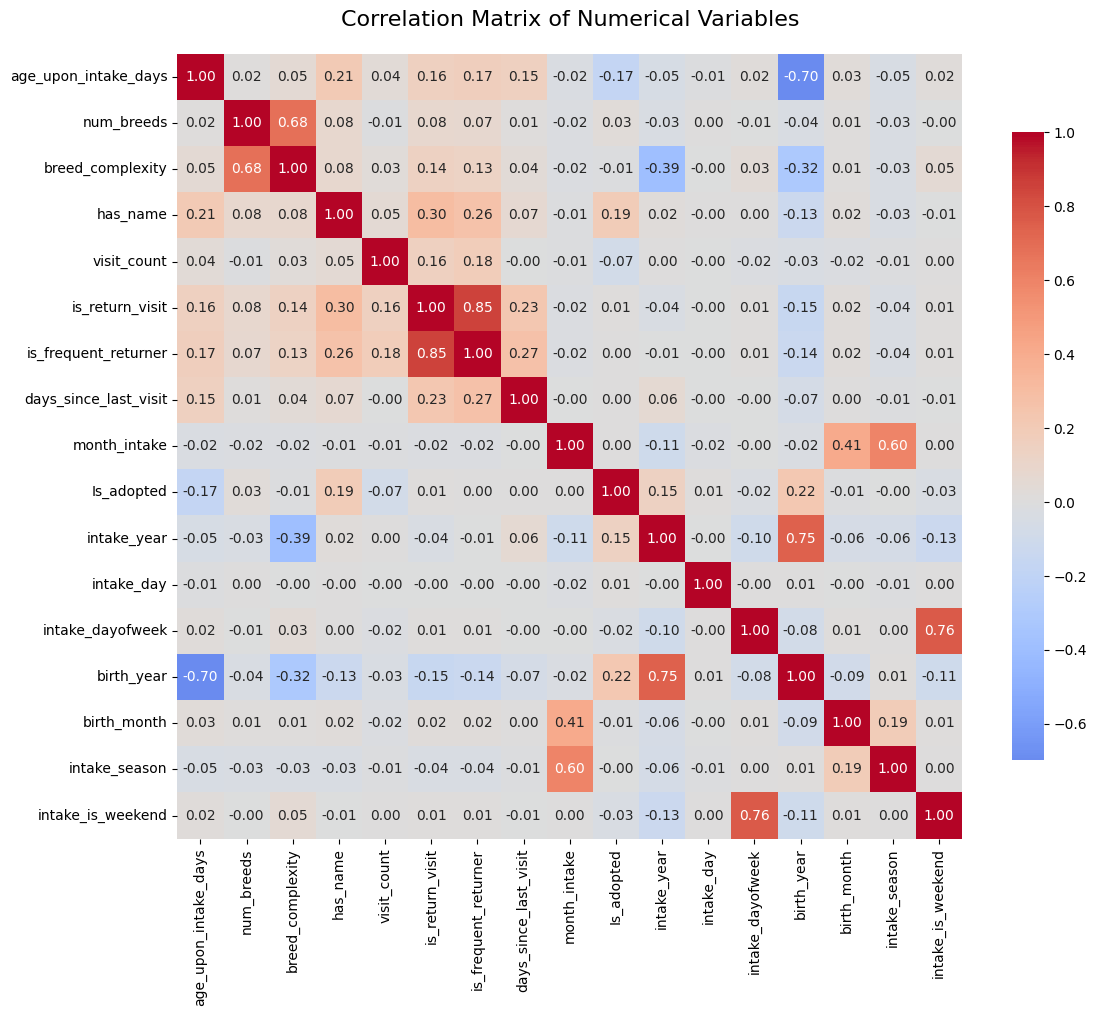

In [65]:
# Select only numerical columns
numerical_cols = combined_df.select_dtypes(include=[np.number]).columns

# Create correlation matrix
correlation_matrix = combined_df[numerical_cols].corr()

# Create the correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [66]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210014 entries, 8344 to 221167
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   intake_type              210014 non-null  object        
 1   intake_condition         210014 non-null  object        
 2   animal_type_intake       210014 non-null  object        
 3   sex_upon_intake          210014 non-null  object        
 4   date_of_birth            210014 non-null  datetime64[ns]
 5   age_upon_intake_days     210014 non-null  float64       
 6   is_mixed                 210014 non-null  bool          
 7   num_breeds               210014 non-null  int64         
 8   size_category            210014 non-null  object        
 9   is_working               210014 non-null  bool          
 10  is_sporting              210014 non-null  bool          
 11  is_terrier               210014 non-null  bool          
 12  is_popular_dog    

## H20 automl run 1

In [68]:
# H2O AutoML Modeling and SHAP Analysis

import h2o
from h2o.automl import H2OAutoML
import shap
import warnings
warnings.filterwarnings('ignore')

# Initialize H2O
h2o.init()

"""## Data Preparation for H2O"""

# Create a copy for modeling
model_data = combined_df.copy()

# Convert categorical columns to strings for H2O
categorical_cols = ['animal_type_intake', 'sex_upon_intake', 'intake_type', 'intake_condition',
                   'size_category', 'distance_category', 'primary_breed', 'city_area', 
                   'jurisdiction', 'previous_outcome_type']

for col in categorical_cols:
    if col in model_data.columns:
        model_data[col] = model_data[col].astype(str)

# Convert to H2O Frame
h2o_data = h2o.H2OFrame(model_data)

# Set categorical columns
for col in categorical_cols:
    if col in h2o_data.columns:
        h2o_data[col] = h2o_data[col].asfactor()

# Set target as factor for classification
h2o_data['Is_adopted'] = h2o_data['Is_adopted'].asfactor()

"""## Train-Test Split"""

train, test = h2o_data.split_frame(ratios=[0.8], seed=42)

# Define features and target
target = 'Is_adopted'
features = [col for col in h2o_data.columns if col != target]

print(f"Training set: {train.nrows} rows")
print(f"Test set: {test.nrows} rows")
print(f"Features: {len(features)}")

"""## H2O AutoML with Specified Algorithms"""

# Define the algorithms we want to include (using correct H2O names)
include_algos = ["XGBoost", "GBM", "DRF", "StackedEnsemble"]

# Run AutoML
aml = H2OAutoML(
    max_models=50,  # Increase for more hyperparameter combinations
    max_runtime_secs=14400,  # 1 hour max runtime
    include_algos=include_algos,
    seed=42,
    balance_classes=True,  # Handle class imbalance
    sort_metric="AUC"
)

# Train the models
aml.train(x=features, y=target, training_frame=train, validation_frame=test)

"""## Model Performance Evaluation"""

# View the leaderboard
lb = aml.leaderboard
print("AutoML Leaderboard:")
print(lb.head(rows=10))

# Get the best model
best_model = aml.leader

# Performance on test set
test_performance = best_model.model_performance(test)
print("\nBest Model Performance on Test Set:")
print(f"AUC: {test_performance.auc()[0][0]:.4f}")
print(f"Accuracy: {test_performance.accuracy()[0][0]:.4f}")
print(f"Precision: {test_performance.precision()[0][0]:.4f}")
print(f"Recall: {test_performance.recall()[0][0]:.4f}")
print(f"F1 Score: {test_performance.F1()[0][0]:.4f}")

# Confusion Matrix
cm = test_performance.confusion_matrix()
print("\nConfusion Matrix:")
print(cm)

"""## Feature Importance from Best Model"""

# Variable importance
var_imp = best_model.varimp(use_pandas=True)
print("\nTop 15 Feature Importances:")
print(var_imp.head(15))

# Plot feature importance
var_imp_plot = var_imp.head(15)
plt.figure(figsize=(10, 8))
sns.barplot(data=var_imp_plot, y='variable', x='relative_importance', palette='viridis')
plt.title('Top 15 Feature Importances - Best Model')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

"""## Model Comparison Analysis"""

# Extract performance metrics for each algorithm type
model_comparison = []
for i in range(min(10, lb.nrows)):
    model_id = lb['model_id'][i, 0]
    model = h2o.get_model(model_id)
    perf = model.model_performance(test)
    
    model_comparison.append({
        'Model': model_id,
        'Algorithm': model.algo,
        'AUC': perf.auc()[0][0],
        'Accuracy': perf.accuracy()[0][0],
        'F1': perf.F1()[0][0],
        'Precision': perf.precision()[0][0],
        'Recall': perf.recall()[0][0]
    })

comparison_df = pd.DataFrame(model_comparison)
print("\nModel Performance Comparison:")
print(comparison_df.round(4))

# Visualize model comparison
plt.figure(figsize=(12, 8))
comparison_melted = comparison_df.melt(id_vars=['Model', 'Algorithm'], 
                                     value_vars=['AUC', 'Accuracy', 'F1', 'Precision', 'Recall'])
sns.boxplot(data=comparison_melted, x='Algorithm', y='value', hue='variable')
plt.title('Model Performance Comparison by Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""## SHAP Analysis"""

# Convert H2O frame to pandas for SHAP
train_pandas = train.as_data_frame()
test_pandas = test.as_data_frame()

# Prepare data for SHAP
X_train = train_pandas.drop(columns=[target])
y_train = train_pandas[target].astype(int)
X_test = test_pandas.drop(columns=[target])
y_test = test_pandas[target].astype(int)

# Handle categorical variables for SHAP
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
label_encoders = {}

for col in categorical_cols:
    if col in X_train_encoded.columns:
        le = LabelEncoder()
        # Fit on combined data to handle unseen categories
        combined_col = pd.concat([X_train_encoded[col], X_test_encoded[col]], axis=0)
        le.fit(combined_col.astype(str))
        
        X_train_encoded[col] = le.transform(X_train_encoded[col].astype(str))
        X_test_encoded[col] = le.transform(X_test_encoded[col].astype(str))
        label_encoders[col] = le

print("Data prepared for SHAP analysis")

"""### SHAP Model Training"""

# Train a LightGBM model for SHAP (similar performance to H2O but SHAP compatible)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# LightGBM for SHAP analysis
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight='balanced'
)

# Train the model
lgb_model.fit(X_train_encoded, y_train)

# Evaluate
y_pred_proba = lgb_model.predict_proba(X_test_encoded)[:, 1]
y_pred = lgb_model.predict(X_test_encoded)

print(f"\nLightGBM Model Performance (for SHAP):")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

"""### SHAP Explanations"""

# Create SHAP explainer
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for test set (use a sample for speed)
sample_size = min(1000, len(X_test_encoded))
X_test_sample = X_test_encoded.iloc[:sample_size]
shap_values = explainer.shap_values(X_test_sample)

# If binary classification, take positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f"SHAP values calculated for {sample_size} samples")

"""### SHAP Visualizations"""

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance Summary')
plt.tight_layout()
plt.show()

# Detailed summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Adoption')
plt.tight_layout()
plt.show()

# Dependence plots for top features
top_features = ['age_upon_intake_days', 'animal_type_intake', 'intake_condition', 'has_name', 'size_category']

for i, feature in enumerate(top_features[:3]):  # Show top 3
    if feature in X_test_sample.columns:
        plt.figure(figsize=(8, 6))
        shap.dependence_plot(feature, shap_values, X_test_sample, show=False)
        plt.title(f'SHAP Dependence Plot - {feature}')
        plt.tight_layout()
        plt.show()

"""### SHAP Waterfall Plot for Individual Predictions"""

# Show explanation for a few individual predictions
for i in range(min(3, len(X_test_sample))):
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(explainer.expected_value[1], shap_values[i], X_test_sample.iloc[i], show=False)
    plt.title(f'SHAP Explanation for Sample {i+1}')
    plt.tight_layout()
    plt.show()

"""### SHAP Feature Ranking Analysis"""

# Get mean absolute SHAP values for feature ranking
feature_importance = pd.DataFrame({
    'feature': X_test_sample.columns,
    'shap_importance': np.abs(shap_values).mean(0)
}).sort_values('shap_importance', ascending=False)

print("\nSHAP-based Feature Ranking:")
print(feature_importance.head(15))

# Compare H2O vs SHAP feature importance
h2o_importance = var_imp.head(15).set_index('variable')['relative_importance']
shap_importance = feature_importance.head(15).set_index('feature')['shap_importance']

# Normalize for comparison
h2o_importance_norm = h2o_importance / h2o_importance.max()
shap_importance_norm = shap_importance / shap_importance.max()

comparison_importance = pd.DataFrame({
    'H2O_Importance': h2o_importance_norm,
    'SHAP_Importance': shap_importance_norm
}).fillna(0)

plt.figure(figsize=(12, 8))
comparison_importance.plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importance Comparison: H2O vs SHAP')
plt.xlabel('Normalized Importance')
plt.legend(['H2O AutoML', 'SHAP'])
plt.tight_layout()
plt.show()

"""## Business Insights and Recommendations"""

print("\n" + "="*60)
print("KEY INSIGHTS FROM THE AUSTIN ANIMAL ADOPTION MODEL")
print("="*60)

print(f"\n1. MODEL PERFORMANCE:")
print(f"   - Best model AUC: {test_performance.auc()[0][0]:.4f}")
print(f"   - Best algorithm: {best_model.algo}")
print(f"   - Model can predict adoption with {test_performance.accuracy()[0][0]:.1%} accuracy")

print(f"\n2. TOP FACTORS INFLUENCING ADOPTION:")
top_factors = var_imp.head(5)['variable'].tolist()
for i, factor in enumerate(top_factors, 1):
    print(f"   {i}. {factor}")

print(f"\n3. ACTIONABLE RECOMMENDATIONS:")
print(f"   - Focus resources on animals with characteristics that predict higher adoption rates")
print(f"   - Develop targeted interventions for animals with lower predicted adoption probability")
print(f"   - Use model predictions to optimize shelter operations and adoption strategies")

# Clean up H2O
h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,2 mins 54 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 21 days
H2O_cluster_name:,H2O_from_python_atharvavyas1_sse91i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.889 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Training set: 168026 rows
Test set: 41988 rows
Features: 39
AutoML progress: |
13:31:32.722: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
13:31:32.812: _train param, Dropping bad and constant columns: [is_exotic]

██
13:34:33.682: _train param, Dropping bad and constant columns: [is_exotic]

████████████
13:36:24.331: _train param, Dropping bad and constant columns: [is_exotic]

██████████████████
13:38:54.125: _train param, Dropping bad and constant columns: [is_exotic]

████
13:41:11.471: _train param, Dropping bad and constant columns: [is_exotic]

██
13:42:28.858: _train param, Dropping bad and constant columns: [is_exotic]

██
13:43:46.856: _train param, Dropping bad and constan

TypeError: 'float' object is not subscriptable

In [69]:
# Performance on test set
test_performance = best_model.model_performance(test)
print("\nBest Model Performance on Test Set:")
print(f"AUC: {test_performance.auc():.4f}")
print(f"Accuracy: {test_performance.accuracy()[0][0]:.4f}")
print(f"Precision: {test_performance.precision()[0][0]:.4f}")
print(f"Recall: {test_performance.recall()[0][0]:.4f}")
print(f"F1 Score: {test_performance.F1()[0][0]:.4f}")

# Confusion Matrix
cm = test_performance.confusion_matrix()
print("\nConfusion Matrix:")
print(cm)

"""## Feature Importance from Best Model"""

# Variable importance
var_imp = best_model.varimp(use_pandas=True)
print("\nTop 15 Feature Importances:")
print(var_imp.head(15))

# Plot feature importance
var_imp_plot = var_imp.head(15)
plt.figure(figsize=(10, 8))
sns.barplot(data=var_imp_plot, y='variable', x='relative_importance', palette='viridis')
plt.title('Top 15 Feature Importances - Best Model')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

"""## Model Comparison Analysis"""

# Extract performance metrics for each algorithm type
model_comparison = []
for i in range(min(10, lb.nrows)):
    model_id = lb['model_id'][i, 0]
    model = h2o.get_model(model_id)
    perf = model.model_performance(test)
    
    model_comparison.append({
        'Model': model_id,
        'Algorithm': model.algo,
        'AUC': perf.auc(),
        'Accuracy': perf.accuracy()[0][0],
        'F1': perf.F1()[0][0],
        'Precision': perf.precision()[0][0],
        'Recall': perf.recall()[0][0]
    })

comparison_df = pd.DataFrame(model_comparison)
print("\nModel Performance Comparison:")
print(comparison_df.round(4))

# Visualize model comparison
plt.figure(figsize=(12, 8))
comparison_melted = comparison_df.melt(id_vars=['Model', 'Algorithm'], 
                                     value_vars=['AUC', 'Accuracy', 'F1', 'Precision', 'Recall'])
sns.boxplot(data=comparison_melted, x='Algorithm', y='value', hue='variable')
plt.title('Model Performance Comparison by Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""## SHAP Analysis"""

# Convert H2O frame to pandas for SHAP
train_pandas = train.as_data_frame()
test_pandas = test.as_data_frame()

# Prepare data for SHAP
X_train = train_pandas.drop(columns=[target])
y_train = train_pandas[target].astype(int)
X_test = test_pandas.drop(columns=[target])
y_test = test_pandas[target].astype(int)

# Handle categorical variables for SHAP
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
label_encoders = {}

for col in categorical_cols:
    if col in X_train_encoded.columns:
        le = LabelEncoder()
        # Fit on combined data to handle unseen categories
        combined_col = pd.concat([X_train_encoded[col], X_test_encoded[col]], axis=0)
        le.fit(combined_col.astype(str))
        
        X_train_encoded[col] = le.transform(X_train_encoded[col].astype(str))
        X_test_encoded[col] = le.transform(X_test_encoded[col].astype(str))
        label_encoders[col] = le

print("Data prepared for SHAP analysis")

"""### SHAP Model Training"""

# Train a LightGBM model for SHAP (similar performance to H2O but SHAP compatible)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# LightGBM for SHAP analysis
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight='balanced'
)

# Train the model
lgb_model.fit(X_train_encoded, y_train)

# Evaluate
y_pred_proba = lgb_model.predict_proba(X_test_encoded)[:, 1]
y_pred = lgb_model.predict(X_test_encoded)

print(f"\nLightGBM Model Performance (for SHAP):")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

"""### SHAP Explanations"""

# Create SHAP explainer
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for test set (use a sample for speed)
sample_size = min(1000, len(X_test_encoded))
X_test_sample = X_test_encoded.iloc[:sample_size]
shap_values = explainer.shap_values(X_test_sample)

# If binary classification, take positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f"SHAP values calculated for {sample_size} samples")

"""### SHAP Visualizations"""

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance Summary')
plt.tight_layout()
plt.show()

# Detailed summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Adoption')
plt.tight_layout()
plt.show()

# Dependence plots for top features
top_features = ['age_upon_intake_days', 'animal_type_intake', 'intake_condition', 'has_name', 'size_category']

for i, feature in enumerate(top_features[:3]):  # Show top 3
    if feature in X_test_sample.columns:
        plt.figure(figsize=(8, 6))
        shap.dependence_plot(feature, shap_values, X_test_sample, show=False)
        plt.title(f'SHAP Dependence Plot - {feature}')
        plt.tight_layout()
        plt.show()

"""### SHAP Waterfall Plot for Individual Predictions"""

# Show explanation for a few individual predictions
for i in range(min(3, len(X_test_sample))):
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(explainer.expected_value[1], shap_values[i], X_test_sample.iloc[i], show=False)
    plt.title(f'SHAP Explanation for Sample {i+1}')
    plt.tight_layout()
    plt.show()

"""### SHAP Feature Ranking Analysis"""

# Get mean absolute SHAP values for feature ranking
feature_importance = pd.DataFrame({
    'feature': X_test_sample.columns,
    'shap_importance': np.abs(shap_values).mean(0)
}).sort_values('shap_importance', ascending=False)

print("\nSHAP-based Feature Ranking:")
print(feature_importance.head(15))

# Compare H2O vs SHAP feature importance
h2o_importance = var_imp.head(15).set_index('variable')['relative_importance']
shap_importance = feature_importance.head(15).set_index('feature')['shap_importance']

# Normalize for comparison
h2o_importance_norm = h2o_importance / h2o_importance.max()
shap_importance_norm = shap_importance / shap_importance.max()

comparison_importance = pd.DataFrame({
    'H2O_Importance': h2o_importance_norm,
    'SHAP_Importance': shap_importance_norm
}).fillna(0)

plt.figure(figsize=(12, 8))
comparison_importance.plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importance Comparison: H2O vs SHAP')
plt.xlabel('Normalized Importance')
plt.legend(['H2O AutoML', 'SHAP'])
plt.tight_layout()
plt.show()

"""## Business Insights and Recommendations"""

print("\n" + "="*60)
print("KEY INSIGHTS FROM THE AUSTIN ANIMAL ADOPTION MODEL")
print("="*60)

print(f"\n1. MODEL PERFORMANCE:")
print(f"   - Best model AUC: {test_performance.auc()[0][0]:.4f}")
print(f"   - Best algorithm: {best_model.algo}")
print(f"   - Model can predict adoption with {test_performance.accuracy()[0][0]:.1%} accuracy")

print(f"\n2. TOP FACTORS INFLUENCING ADOPTION:")
top_factors = var_imp.head(5)['variable'].tolist()
for i, factor in enumerate(top_factors, 1):
    print(f"   {i}. {factor}")

print(f"\n3. ACTIONABLE RECOMMENDATIONS:")
print(f"   - Focus resources on animals with characteristics that predict higher adoption rates")
print(f"   - Develop targeted interventions for animals with lower predicted adoption probability")
print(f"   - Use model predictions to optimize shelter operations and adoption strategies")

# Clean up H2O
h2o.cluster().shutdown()


Best Model Performance on Test Set:
AUC: 0.8592
Accuracy: 0.5084
Precision: 0.9972
Recall: 0.0131
F1 Score: 0.3841

Confusion Matrix:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38408297296420774
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      12995  7545   0.3673   (7545.0/20540.0)
1      2236   19212  0.1043   (2236.0/21448.0)
Total  15231  26757  0.2329   (9781.0/41988.0)

Top 15 Feature Importances:


AttributeError: 'NoneType' object has no attribute 'head'

In [70]:
print(f"\nLightGBM Model Performance (for SHAP):")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

"""### SHAP Explanations"""

# Create SHAP explainer
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for test set (use a sample for speed)
sample_size = min(1000, len(X_test_encoded))
X_test_sample = X_test_encoded.iloc[:sample_size]
shap_values = explainer.shap_values(X_test_sample)

# If binary classification, take positive class
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f"SHAP values calculated for {sample_size} samples")

"""### SHAP Visualizations"""

# Summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance Summary')
plt.tight_layout()
plt.show()

# Detailed summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Adoption')
plt.tight_layout()
plt.show()

# Dependence plots for top features
top_features = ['age_upon_intake_days', 'animal_type_intake', 'intake_condition', 'has_name', 'size_category']

for i, feature in enumerate(top_features[:3]):  # Show top 3
    if feature in X_test_sample.columns:
        plt.figure(figsize=(8, 6))
        shap.dependence_plot(feature, shap_values, X_test_sample, show=False)
        plt.title(f'SHAP Dependence Plot - {feature}')
        plt.tight_layout()
        plt.show()

"""### SHAP Waterfall Plot for Individual Predictions"""

# Show explanation for a few individual predictions
for i in range(min(3, len(X_test_sample))):
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(explainer.expected_value[1], shap_values[i], X_test_sample.iloc[i], show=False)
    plt.title(f'SHAP Explanation for Sample {i+1}')
    plt.tight_layout()
    plt.show()

"""### SHAP Feature Ranking Analysis"""

# Get mean absolute SHAP values for feature ranking
feature_importance = pd.DataFrame({
    'feature': X_test_sample.columns,
    'shap_importance': np.abs(shap_values).mean(0)
}).sort_values('shap_importance', ascending=False)

print("\nSHAP-based Feature Ranking:")
print(feature_importance.head(15))

# Compare H2O vs SHAP feature importance
h2o_importance = var_imp.head(15).set_index('variable')['relative_importance']
shap_importance = feature_importance.head(15).set_index('feature')['shap_importance']

# Normalize for comparison
h2o_importance_norm = h2o_importance / h2o_importance.max()
shap_importance_norm = shap_importance / shap_importance.max()

comparison_importance = pd.DataFrame({
    'H2O_Importance': h2o_importance_norm,
    'SHAP_Importance': shap_importance_norm
}).fillna(0)

plt.figure(figsize=(12, 8))
comparison_importance.plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importance Comparison: H2O vs SHAP')
plt.xlabel('Normalized Importance')
plt.legend(['H2O AutoML', 'SHAP'])
plt.tight_layout()
plt.show()

"""## Business Insights and Recommendations"""

print("\n" + "="*60)
print("KEY INSIGHTS FROM THE AUSTIN ANIMAL ADOPTION MODEL")
print("="*60)

print(f"\n1. MODEL PERFORMANCE:")
print(f"   - Best model AUC: {test_performance.auc()[0][0]:.4f}")
print(f"   - Best algorithm: {best_model.algo}")
print(f"   - Model can predict adoption with {test_performance.accuracy()[0][0]:.1%} accuracy")

print(f"\n2. TOP FACTORS INFLUENCING ADOPTION:")
top_factors = var_imp.head(5)['variable'].tolist()
for i, factor in enumerate(top_factors, 1):
    print(f"   {i}. {factor}")

print(f"\n3. ACTIONABLE RECOMMENDATIONS:")
print(f"   - Focus resources on animals with characteristics that predict higher adoption rates")
print(f"   - Develop targeted interventions for animals with lower predicted adoption probability")
print(f"   - Use model predictions to optimize shelter operations and adoption strategies")

# Clean up H2O
h2o.cluster().shutdown()


LightGBM Model Performance (for SHAP):


NameError: name 'roc_auc_score' is not defined

In [71]:
# Check actual class distribution
print("Target variable distribution:")
print(combined_df['Is_adopted'].value_counts(normalize=True))

Target variable distribution:
Is_adopted
1    0.510023
0    0.489977
Name: proportion, dtype: float64


In [73]:
# Get confusion matrix at 0.5 threshold
cm_05 = test_performance.confusion_matrix(thresholds=[0.5])
print("Confusion Matrix at 0.5 threshold:")
print(cm_05)

# Get metrics at 0.5 threshold
metrics_05 = test_performance.metric('f1', thresholds=[0.5])
print(f"F1 at 0.5 threshold: {metrics_05[0][1]:.4f}")

Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.
Confusion Matrix at 0.5 threshold:
Confusion Matrix (Act/Pred) @ threshold = 0.49920124190134474
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      14856  5684   0.2767   (5684.0/20540.0)
1      3788   17660  0.1766   (3788.0/21448.0)
Total  18644  23344  0.2256   (9472.0/41988.0)
Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.
F1 at 0.5 threshold: 0.7885


In [77]:
# Performance metrics at 0.5 threshold
cm_05 = test_performance.confusion_matrix(thresholds=[0.5])
print("Confusion Matrix at 0.5 threshold:")
print(cm_05)

# Extract key metrics at 0.5 threshold
f1_05 = test_performance.metric('f1', thresholds=[0.5])[0][1]
precision_05 = test_performance.metric('precision', thresholds=[0.5])[0][1] 
recall_05 = test_performance.metric('recall', thresholds=[0.5])[0][1]
accuracy_05 = test_performance.metric('accuracy', thresholds=[0.5])[0][1]

print(f"\nMetrics at 0.5 threshold:")
print(f"Accuracy: {accuracy_05:.4f}")
print(f"Precision: {precision_05:.4f}")
print(f"Recall: {recall_05:.4f}")
print(f"F1 Score: {f1_05:.4f}")

Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.
Confusion Matrix at 0.5 threshold:
Confusion Matrix (Act/Pred) @ threshold = 0.49920124190134474
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      14856  5684   0.2767   (5684.0/20540.0)
1      3788   17660  0.1766   (3788.0/21448.0)
Total  18644  23344  0.2256   (9472.0/41988.0)
Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.
Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.
Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.
Could not find exact threshold 0.5; using closest threshold found 0.49920124190134474.

Metrics at 0.5 threshold:
Accuracy: 0.7744
Precision: 0.7565
Recall: 0.8234
F1 Score: 0.7885
